In [2]:
# step 1
#data set load
from sklearn.datasets import load_digits
data=load_digits()
x=data.data
y=data.target
print(x.shape)
import numpy as np
print(np.unique(y))
print(y)


(1797, 64)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 ... 8 9 8]


In [4]:
import pandas as pd
pd.DataFrame(x).isna().sum()
pd.DataFrame(x).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [6]:
# step 2 train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(1257, 64)
(540, 64)


In [7]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score
print('Test Acc=',accuracy_score(y_test,y_pred))

Test Acc= 0.9907407407407407


<AxesSubplot:>

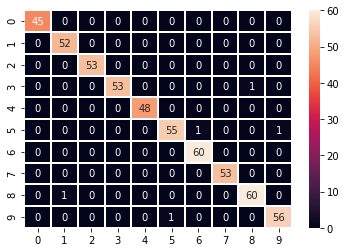

In [15]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d',linewidths=1)

In [16]:
from sklearn.metrics import classification_report
cfr=classification_report(y_test,y_pred)
print(cfr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       1.00      1.00      1.00        53
           3       1.00      0.98      0.99        54
           4       1.00      1.00      1.00        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       1.00      1.00      1.00        53
           8       0.98      0.98      0.98        61
           9       0.98      0.98      0.98        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [17]:
#FS
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier().fit(x,y)
sm=SelectFromModel(model,prefit=True)
x_new=sm.transform(x)
print(x_new.shape)

(1797, 32)


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
#SVM
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Test Acc=',accuracy_score(y_test,y_pred))


(1257, 32)
(540, 32)
Test Acc= 0.9907407407407407


In [24]:
#Pca Unsupeervised dimention reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
pca.fit(x_train)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

x_train_pca=pca.transform(x_train)

x_test_pca=pca.transform(x_test)
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train_pca,y_train)
y_pred=clf.predict(x_test_pca)
#test accuracy
from sklearn.metrics import accuracy_score
print('Test Acc=',accuracy_score(y_test,y_pred))




Test Acc= 0.975925925925926


In [25]:
#Pca Unsupeervised dimention reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
pca=PCA(n_components=9)
pca.fit(x_train)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

x_train_pca=pca.transform(x_train)

x_test_pca=pca.transform(x_test)

clf=SVC()
clf.fit(x_train_pca,y_train)
y_pred=clf.predict(x_test_pca)
#test accuracy
from sklearn.metrics import accuracy_score
print('Test Acc=',accuracy_score(y_test,y_pred))




Test Acc= 0.975925925925926


In [26]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

clf=DecisionTreeClassifier()
clf.fit(x_train_pca,y_train)
y_pred=clf.predict(x_test_pca)
#test accuracy
from sklearn.metrics import accuracy_score
print('Test Acc=',accuracy_score(y_test,y_pred))


Test Acc= 0.8592592592592593


In [31]:
#Hyper Parameter tunning
para={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
   'max_depth':[1,3,5,7,9,11],
    'ax_lead_nodes':[10,20,30,40,50]
}
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()
model1=GridSearchCV(model,param_grid=param,cv=3)
model1.fit(x_train,y_train)
y_pred=model1.prdict(x_test)
print('Test Acc=',accuracy_score(y_test,y_pred))

NameError: name 'param' is not defined

In [32]:
model1.best_estimator_

NameError: name 'model1' is not defined

In [ ]:
###ROC AUC
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
